## Table Of Contents
<font size=3rem>
    
0 -**[ INTRO](#INTRODUCTION)<br>**
1 -**[ OBTAIN](#OBTAIN)**<br>
2 -**[ PREPROCESSING](#PREPROCESSING)**<br>
4 -**[ MODEL](#MODEL)**<br>
5 -**[ INTERPRET](#INTERPRET)**<br>
6 -**[ CONCLUSIONS & RECCOMENDATIONS](#Conclusions-&-Recommendations)<br>**
</font>
___

# INTRODUCTION

- Student: Cody Freese
- Pace: Self Paced
- Jeff Herman

- Pneumonia Chest Xray Image Classification
    - Objective
        - First I need to decide on:
            - Accuracy
            - Precision
            - Recall
            - F1 Score
        - Priority
            - (1) Do not want to tell a sick person they are healthy
            
            - (2) Accurately identify pneumonia
            - (3) Tell healthy person they are sick

## Import Tools

In [28]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

# OBTAIN

In [12]:
# #Home Directory
# home_path = r'C:\Users\c_fre\Learn.co\Module_4_Project\Image-Classification\chest_xray'

# #Train Directory
# train_path = os.path.join(home_path,'train')
# os.mkdir(train_path)

# #Validation Directory
# val_path = os.path.join(home_path,'val')
# os.mkdir(val_path)

# #Train Subdirectories
# normal_train_path = os.path.join(home_path + r'/train','NORMAL')
# os.mkdir(normal_train_path)

# pneumonia_train_path = os.path.join(home_path + r'/train','PNEUMONIA')
# os.mkdir(pneumonia_train_path)

# #Validation Subdirectories
# normal_val_path = os.path.join(home_path + r'val','NORMAL')
# os.mkdir(normal_val_path)

# pneumonia_val_path = os.path.join(home_path + r'val','PNEUMONIA')
# os.mkdir(pneumonia_val_path)

In [15]:
#Home Directory
home_path = r'C:\Users\c_fre\Learn.co\Module_4_Project\Image-Classification\chest_xray'

#Train Directory
try:
    train_path = os.path.join(home_path,'train')
    os.mkdir(train_path)
except FileExistsError:
    pass

#Validation Directory
try:
    val_path = os.path.join(home_path,'val')
    os.mkdir(val_path)
except FileExistsError:
    pass

#Train Subdirectories
try:
    normal_train_path = os.path.join(home_path + r'/train','NORMAL')
    os.mkdir(normal_train_path)
except FileExistsError:
    pass

try:
    pneumonia_train_path = os.path.join(home_path + r'/train','PNEUMONIA')
    os.mkdir(pneumonia_train_path)
except FileExistsError:
    pass

#Validation Subdirectories
try:
    normal_val_path = os.path.join(home_path + r'/val','NORMAL')
    os.mkdir(normal_val_path)
except FileExistsError:
    pass

try:
    pneumonia_val_path = os.path.join(home_path + r'/val','PNEUMONIA')
    os.mkdir(pneumonia_val_path)
except FileExistsError:
    pass

In [16]:
# #Create Pathway to access data
main_dir = '../Image-Classification/chest_xray/'
train_dir = main_dir + "train/"
val_dir = main_dir + "val/"
test_dir = main_dir + "test/"

# #Observe Contents
print('Directory Contents:',os.listdir(main_dir))
print('train Contents:',os.listdir(train_dir))
print('val Contents:',os.listdir(val_dir))
print('test Contents:',os.listdir(val_dir))

Directory Contents: ['test', 'train', 'val']
train Contents: ['NORMAL', 'PNEUMONIA']
val Contents: ['NORMAL', 'PNEUMONIA']
test Contents: ['NORMAL', 'PNEUMONIA']


In [17]:
# #Train dataset for Normal and Pneumonia
train_normal = train_dir + 'Normal/'
train_pneumonia = train_dir + 'Pneumonia/'

print("Number of cases in Training:",len(os.listdir(train_normal)) +len(os.listdir(train_pneumonia)))

print("Number of Pneumonia cases in Training:",len(os.listdir(train_pneumonia)))

print("Number of Normal cases in Training:",len(os.listdir(train_normal)))

Number of cases in Training: 5216
Number of Pneumonia cases in Training: 3875
Number of Normal cases in Training: 1341


In [18]:
# #Validation dataset for Normal and Pneumonia
val_normal = val_dir + 'Normal/'
val_pneumonia = val_dir + 'Pneumonia/'

print("Number of cases in Validation:",len(os.listdir(val_normal)) +len(os.listdir(val_pneumonia)))

print("Number of Pneumonia cases in Validation:",len(os.listdir(val_pneumonia)))

print("Number of Normal cases in Validation:",len(os.listdir(val_normal)))

Number of cases in Validation: 16
Number of Pneumonia cases in Validation: 8
Number of Normal cases in Validation: 8


In [19]:
# #Test dataset for Normal and Pneumonia
test_normal = test_dir + 'Normal/'
test_pneumonia = test_dir + 'Pneumonia/'

print("Number of cases in Test:",len(os.listdir(test_normal)) +len(os.listdir(test_pneumonia)))

print("Number of Pneumonia cases in Test:",len(os.listdir(test_pneumonia)))

print("Number of Normal cases in Test:",len(os.listdir(test_normal)))

Number of cases in Test: 624
Number of Pneumonia cases in Test: 390
Number of Normal cases in Test: 234


In [20]:
# #Total number of Normal Cases
print("Total number of Normal cases:",
      len(os.listdir(test_normal))+
      len(os.listdir(train_normal))+
      len(os.listdir(val_normal)))

#Total number of Pneumonia Cases
print("Total number of Pneumonia cases:",
      len(os.listdir(test_pneumonia))+
      len(os.listdir(train_pneumonia))+
      len(os.listdir(val_pneumonia)))

Total number of Normal cases: 1583
Total number of Pneumonia cases: 4273


# PREPROCESSING

In [34]:
# Shape
print(main_dir.train_dir.shape, main_dir.test_dir.shape)

AttributeError: 'str' object has no attribute 'train_dir'

AttributeError: 'str' object has no attribute 'train_path'

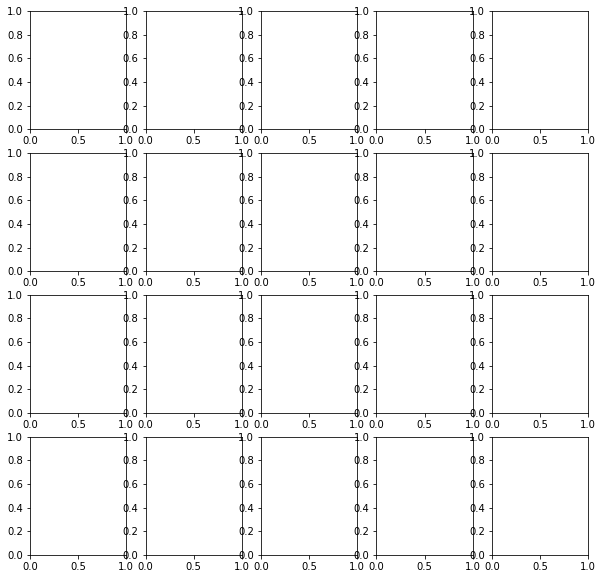

In [39]:
# First 10 Images in Training
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,10))
for n in range(10):
    i = n //5
    j = n%5
    ax = axes[i][j]
    ax.imshow(home_path.train_path[n], cmap=plt.cm.gray)
plt.title('First 10 in Training');

In [23]:
dataset = keras.preprocessing.image_dataset_from_directory(
    '../Image-Classification/chest_xray/')



AttributeError: module 'keras' has no attribute 'preprocessing'

In [ ]:
print(X_train.shape)
X_test.shape

In [ ]:
#Normalizing Image Data
train_dir = ImageDataGenerator(rescale=1./255,
                              zoom_range=0.3, vertical_flip=True)
test_dir = ImageDataGenerator(rescale=1./255)

In [ ]:
img_dims = 150
epochs = 10
batch_size = 64